# Time Deltas and Periods

Timestamps represent absolute points in time ("January 1st 2018 at 9PM"). But when dealing with time and dates we also need to represent time intervals, time offsets and relative measurements of time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

## Time Offsets

`pd.Timedelta` is used to represent time offsets; which are basically "differences" in times. For example, how much time did the script take to run? For how long you've been waiting? How many days until your birthday? Python has a builtin `datetime.timedelta`, pandas has `pd.Timedelta` which is a little bit more powerful:

In [2]:
pd.Timedelta('1 day')

Timedelta('1 days 00:00:00')

In [3]:
pd.Timedelta('1 d')

Timedelta('1 days 00:00:00')

In [4]:
pd.Timedelta('1d')

Timedelta('1 days 00:00:00')

In [5]:
pd.Timedelta('1.5 hours')

Timedelta('0 days 01:30:00')

In [6]:
pd.Timedelta('1d2h')

Timedelta('1 days 02:00:00')

In [7]:
pd.Timedelta('-1 day, 2h')

Timedelta('-2 days +22:00:00')

Timedeltas also work with tiny units of time:

In [8]:
pd.Timedelta('1 ms')

Timedelta('0 days 00:00:00.001000')

In [9]:
pd.Timedelta('1 microsecond')

Timedelta('0 days 00:00:00.000001')

In [10]:
pd.Timedelta('1 ns')

Timedelta('0 days 00:00:00.000000')

🤔 seems like it didn't count it. But it did. The problem is the precision used to display the times is up to 1 microsecond. The nanosecond is there, it's just not shown:

In [11]:
pd.Timedelta('1 ns') * 1e9

Timedelta('0 days 00:00:01')

The whole purpose of timedeltas is to make operation with timestamps (adding or subtracting to them). For example, "notify me in one day from now":

In [12]:
pd.Timestamp.now() + pd.Timedelta('1d')

Timestamp('2018-07-12 15:55:27.562070')

How many days until the world cup?

In [13]:
world_cup_first_match = pd.Timestamp('June 14 2018, 3PM UTC')
world_cup_first_match

Timestamp('2018-06-14 15:00:00+0000', tz='UTC')

In [14]:
world_cup_first_match - pd.Timestamp.now('UTC')

Timedelta('-28 days +20:04:32.072178')

## Periods

`pd.Period` lets you work with periods or intervals of time (sometimes also called "time spans").

A 1 day period:

In [3]:
pd.Period('2018-1-1')

Period('2018-01-01', 'D')

In [4]:
pd.Period('2018-1-1').start_time, pd.Period('2018-1-1').end_time

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-01-01 23:59:59.999999999'))

A 1 month period:

In [16]:
pd.Period('2018-1')

Period('2018-01', 'M')

A 1 year period:

In [17]:
pd.Period('2018')

Period('2018', 'A-DEC')

A 1 "week-ish" period, starting on Jan 1st until Jan 7th:

In [18]:
pd.Period('2018-01-01/2018-01-07')

Period('2018-01-01 20:18', 'T')

In [19]:
weekish = pd.Period('2018-01-01/2018-01-07')
weekish.start_time, weekish.end_time

(Timestamp('2018-01-01 20:18:00'), Timestamp('2018-01-01 20:18:59.999999999'))

A more correct approach would be to set the frequency to week:

In [20]:
pd.Period('2018-1-1', freq='W')

Period('2018-01-01/2018-01-07', 'W-SUN')

In [21]:
true_week = pd.Period('2018-1-1', freq='W')
true_week.start_time, true_week.end_time

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-01-07 23:59:59.999999999'))

Periods might look like dates, but remember, they represent an "interval":

In [22]:
pd.Timestamp('2018-01-01 12:00')

Timestamp('2018-01-01 12:00:00')

In [23]:
pd.Period('2018-01-01 12:00', freq='H')

Period('2018-01-01 12:00', 'H')

In [24]:
pd.Period('2018-01-01 12:30:15')

Period('2018-01-01 12:30:15', 'S')

And they can be pretty <s>crazy</s> flexible:

In [25]:
pd.Period('4Q2017').start_time

Timestamp('2017-10-01 00:00:00')

### Period Ranges

As we have timestamp ranges, we can also create "period ranges". Let's see a few examples:

In [26]:
pd.period_range('2018-01-01', freq='H', periods=12)

PeriodIndex(['2018-01-01 00:00', '2018-01-01 01:00', '2018-01-01 02:00',
             '2018-01-01 03:00', '2018-01-01 04:00', '2018-01-01 05:00',
             '2018-01-01 06:00', '2018-01-01 07:00', '2018-01-01 08:00',
             '2018-01-01 09:00', '2018-01-01 10:00', '2018-01-01 11:00'],
            dtype='period[H]', freq='H')

In [27]:
pd.period_range('2018-01-01', '2018-01-02', freq='H')

PeriodIndex(['2018-01-01 00:00', '2018-01-01 01:00', '2018-01-01 02:00',
             '2018-01-01 03:00', '2018-01-01 04:00', '2018-01-01 05:00',
             '2018-01-01 06:00', '2018-01-01 07:00', '2018-01-01 08:00',
             '2018-01-01 09:00', '2018-01-01 10:00', '2018-01-01 11:00',
             '2018-01-01 12:00', '2018-01-01 13:00', '2018-01-01 14:00',
             '2018-01-01 15:00', '2018-01-01 16:00', '2018-01-01 17:00',
             '2018-01-01 18:00', '2018-01-01 19:00', '2018-01-01 20:00',
             '2018-01-01 21:00', '2018-01-01 22:00', '2018-01-01 23:00',
             '2018-01-02 00:00'],
            dtype='period[H]', freq='H')

Note that the type of the returned value is a `PeriodIndex`. They're meant to be used as indexes. For example, with periods we can represent "visits per hour". We could have used the "start second of every hour", but a more correct representation is a `Period`:

In [28]:
period_index = pd.period_range('2018-01-01', freq='H', periods=12)
period_index

PeriodIndex(['2018-01-01 00:00', '2018-01-01 01:00', '2018-01-01 02:00',
             '2018-01-01 03:00', '2018-01-01 04:00', '2018-01-01 05:00',
             '2018-01-01 06:00', '2018-01-01 07:00', '2018-01-01 08:00',
             '2018-01-01 09:00', '2018-01-01 10:00', '2018-01-01 11:00'],
            dtype='period[H]', freq='H')

In [29]:
ts = pd.Series(np.random.randn(12) * 5 + 500, index=period_index)

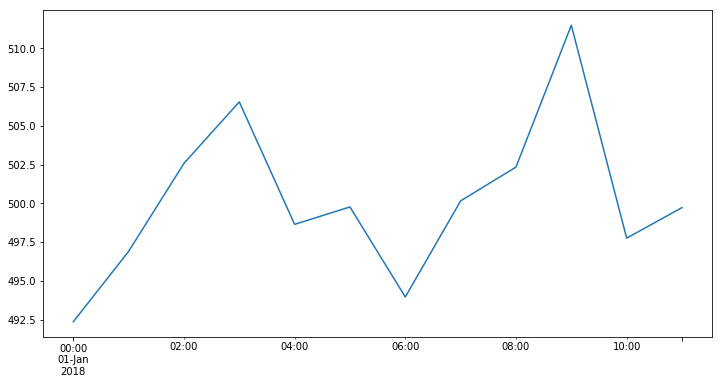

In [30]:
ts.plot(figsize=(12, 6))

Finally, some shower thought... We could argue that **everything** is a period. For example, the timestamp "January 1st, 2018 at 12:50:41" is actually the period of 1000 milliseconds elapsed since `"January 1st, 2018 at 12:50:41.000"` and `"January 1st, 2018 at 12:50:42"`.

In [31]:
pd.Timestamp('January 1st, 2018 at 12:50:41')

Timestamp('2018-01-01 12:50:41')

In [32]:
pd.Timestamp('January 1st, 2018 at 12:50:41').to_period(freq='S')

Period('2018-01-01 12:50:41', 'S')

In [33]:
p = pd.Timestamp('January 1st, 2018 at 12:50:41').to_period(freq='S')
p.start_time, p.end_time

(Timestamp('2018-01-01 12:50:41'), Timestamp('2018-01-01 12:50:41.999999999'))

## to_datetime

Finally, we want to quickly show you the `pd.to_datetime` function, as it's pretty flexible and useful. It tries to parse the argument into a timestamp. Examples:

In [34]:
pd.to_datetime('2018-1-1')

Timestamp('2018-01-01 00:00:00')

In [35]:
pd.to_datetime(['2018-1-1', '2018-1-2', '2018-1-3'])

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [36]:
pd.to_datetime(['2018-1', '2018-1', '2018-1'])

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [37]:
pd.to_datetime('8/1/2018')

Timestamp('2018-08-01 00:00:00')

In [38]:
pd.to_datetime('8/1/2018', dayfirst=True)

Timestamp('2018-01-08 00:00:00')